In [22]:
import os
import tweepy as tw
import pandas as pd
import json
consumer_key= 'mykey'
consumer_secret= 'mysecret'
auth = tw.OAuthHandler(consumer_key, consumer_secret)
api = tw.API(auth, wait_on_rate_limit=True)
cnt=0
arr=[]
for tweet in tw.Cursor(api.search, q='#GodiMediaAgainstFarmers -filter:retweets', rpp=10, exclude_replies=True, count=2, exclude_retweets=True).items():
    print(cnt)
    arr.append(tweet._json)
    cnt=cnt+1
    if(cnt==11000):
        break
data_dump = open("data_dump", "w")
print(json.dumps(arr), file=data_dump)
print("legthhhhh",len(arr))

0
1
2
3
legthhhhh 4


In [1]:
import json
with open('data_dump') as json_file:
    data = json.load(json_file)

In [16]:
data[0]

{'created_at': 'Mon Dec 21 05:58:33 +0000 2020',
 'id': 1340899439137992704,
 'id_str': '1340899439137992704',
 'text': '@jatt_junction @punjabisath1 ‡®¶‡©á‡®∏‡®º ‡®µ‡®ø‡®∞‡©ã‡®ß‡©Ä ‡®≠‡®æ‡®ú‡®™‡®æ ‡®∏‡®∞‡®ï‡®æ‡®∞\n#GodiMediaAgainstFarmers',
 'truncated': False,
 'entities': {'hashtags': [{'text': 'GodiMediaAgainstFarmers',
    'indices': [53, 77]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'jatt_junction',
    'name': '‡®¨‡®æ‡®¨‡®æ ‡®¨‡®ñ‡®§‡©å‡®∞‡®æ',
    'id': 1313354713,
    'id_str': '1313354713',
    'indices': [0, 14]},
   {'screen_name': 'punjabisath1',
    'name': '‡®™‡©∞‡®ú‡®æ‡®¨‡©Ä ‡®∏‡©±‡®• üå≥',
    'id': 1588330345,
    'id_str': '1588330345',
    'indices': [15, 28]}],
  'urls': []},
 'metadata': {'iso_language_code': 'pa', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': 1340845483971936257,
 'in_reply_to_status_id_str': '1340845483971936257',
 'in_reply_to

In [2]:
a={}
for val in data:
    if val['source'] in a:
        a[val['source']]+=1
    else:
        a[val['source']]=1
a

{'<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>': 6608,
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 3699,
 '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>': 624,
 '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>': 19,
 '<a href="http://thermoengineers.com" rel="nofollow">SuperbotApi</a>': 13,
 '<a href="https://buffer.com" rel="nofollow">Buffer</a>': 2,
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 2,
 '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>': 3,
 '<a href="https://waitrose.in" rel="nofollow">ISupportFarmers</a>': 30}

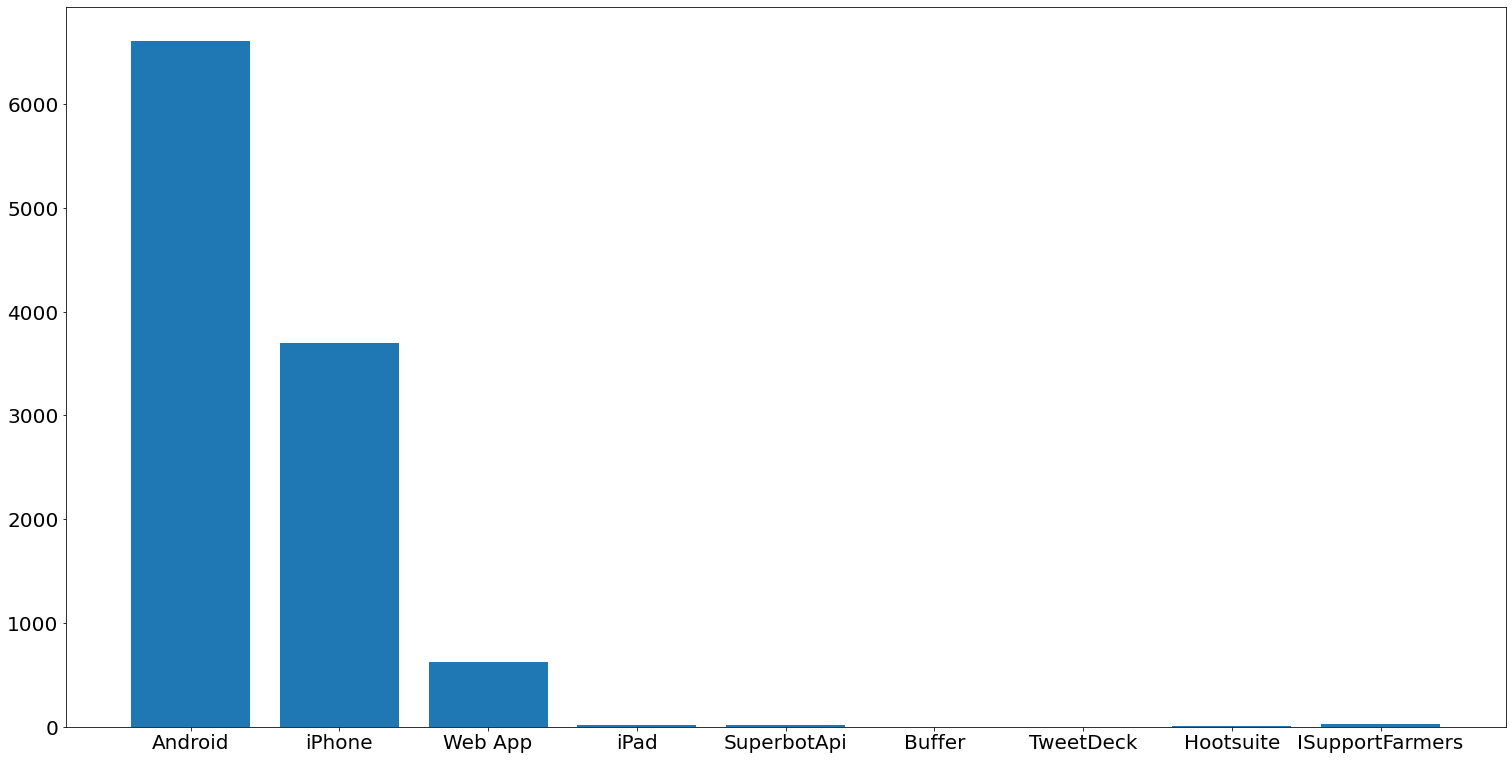

In [3]:
arra1=["Android", "iPhone", "Web App", "iPad", "SuperbotApi", "Buffer", "TweetDeck", "Hootsuite", "ISupportFarmers"]
arra2=list(a.values())
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,10
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(arra1, arra2)
plt.show()

Most of the users who tweeted this used their mobile devices. We also notice that there is a significant portion of the users using iPhone. This suggests that despite this issue being related to farmers, even  people who are rich enough to buy iPhone(considered to be a high-class thing in India) are tweeting about it. 

In [4]:
d={}
for val in data:
    if(val['lang'] in d):
        d[val['lang']]+=1
    else:
        d[val['lang']]=1
d={k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}

['en', 'und', 'pa', 'hi', 'in', 'tl', 'et', 'ht', 'cy', 'hu', 'da', 'fr', 'es', 'sv', 'pt', 'nl', 'tr', 'it', 'no', 'fi', 'sl', 'eu', 'de', 'pl', 'ro', 'lv', 'is', 'lt', 'ca', 'vi', 'cs', 'mr', 'ne', 'kn', 'bn', 'ta', 'ml']
[3402, 2725, 2317, 1061, 600, 215, 203, 89, 52, 44, 36, 33, 32, 21, 20, 16, 16, 15, 12, 11, 10, 10, 10, 9, 8, 7, 7, 4, 4, 2, 2, 2, 1, 1, 1, 1, 1]


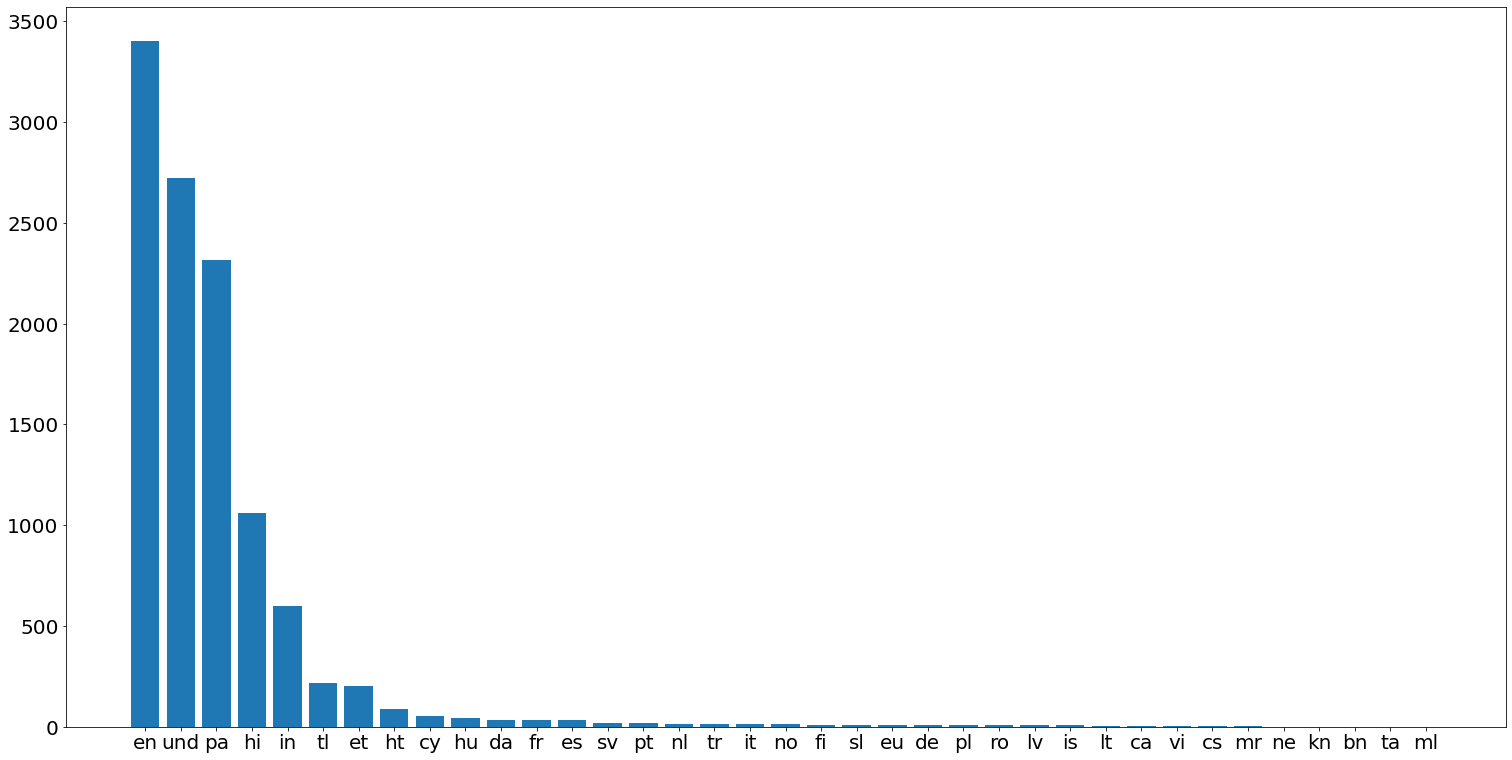

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,10
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
arr1=(list(d.keys()))
arr2=(list(d.values()))
print(arr1)
print(arr2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(arr1, arr2)
plt.show()
fig.savefig('bargraph_with_python.png')

From the above graph, we can see that ~3500 tweets are in English, which is indicative of use of English in formal social media. We also notice that the second highest langauge is Punjabi, which is because the Farmer's Bill Issue severely affects Punjabi Farmers, and this is the reason behind the high amount of Punjabi tweets(2317 tweets).

(array([6.221e+03, 2.187e+03, 6.260e+02, 2.250e+02, 1.720e+02, 2.210e+02,
        1.750e+02, 6.800e+01, 6.900e+01, 8.000e+01, 9.600e+01, 3.200e+01,
        4.000e+01, 1.100e+01, 6.700e+01, 3.600e+01, 4.000e+01, 4.100e+01,
        1.400e+01, 6.300e+01, 1.800e+01, 2.300e+01, 1.600e+01, 5.000e+00,
        3.000e+00, 4.800e+01, 6.000e+00, 1.200e+01, 2.300e+01, 5.000e+00,
        2.000e+00, 8.000e+00, 2.000e+00, 9.000e+00, 3.000e+00, 5.000e+00,
        2.000e+00, 4.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 2.600e+01,
        1.400e+01, 4.000e+00, 9.000e+00, 5.000e+00, 0.000e+00, 9.000e+00,
        2.000e+00, 6.000e+00, 3.000e+00, 2.400e+01, 1.200e+01, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 5.200e+01, 0.000e+00, 2.000e+00, 8.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        7.000e+00, 1.000e+00, 0.000e+0

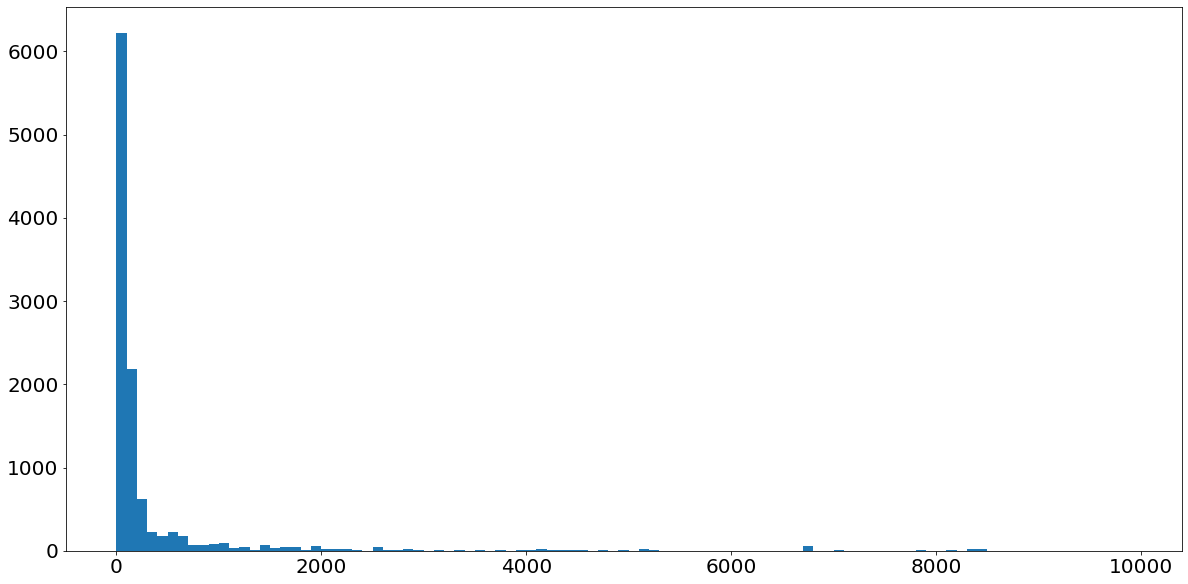

In [10]:
import numpy as np 
dic={}
for val in data:
    if(val['user']['followers_count'] in dic):
        dic[val['user']['followers_count']]+=1
    else:
        dic[val['user']['followers_count']]=1
arr1=[]
arr2=[] 
for i in sorted (dic): 
    arr1.append(i)
    arr2.append(dic[i])
i=0
binarr=[]
while i<10000:
    binarr.append(i)
    i+=100
npar=np.array(arr1)
plt.rcParams["figure.figsize"]=20,10
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.hist(npar, bins=binarr, weights=arr2)



The above Histogram indicates that a large number of people who are tweeting about this have very less follower counts, i.e. are not very influential people. For example, there are 6000+ users with followers in the range of 0-100, 2000+ in the range of 100-200, which itself covers more than 80% of the tweets.

(array([1.0947e+04, 3.4000e+01, 1.1000e+01, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

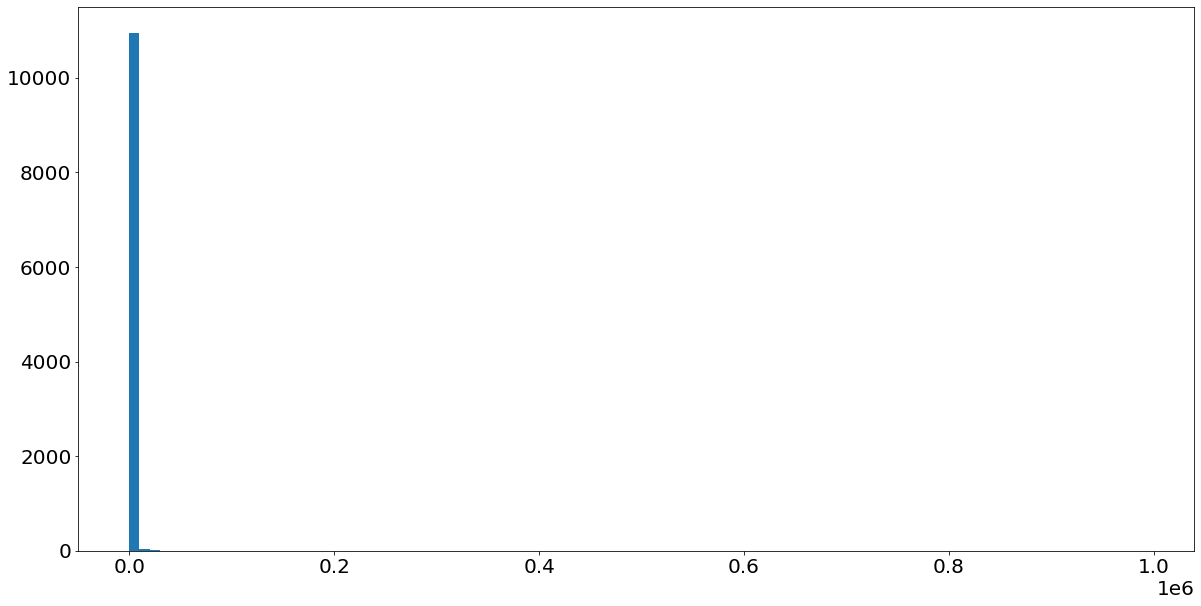

In [11]:
plt.show()
binarr=[]
i=0
while i<1000000:
    binarr.append(i)
    i+=10000
plt.hist(arr1, bins=binarr, weights=arr2)

From the above plot, we can see that out of 11,000 tweets 10,947 are from users with followers <=10,000. This again supports the fact that majority are less influential people on twitter.

In [13]:
dict_place={}
counter=0
for val in data:
    if isinstance(val['place'],int) or val['place'] is None:
        continue
    if 'full_name' in val['place']:
        if val['place']['full_name'] in dict_place:
            dict_place[val['place']['full_name']]+=1
        else:
            dict_place[val['place']['full_name']]=1
        counter+=1
dict_place={k: v for k, v in sorted(dict_place.items(), key=lambda item: item[1], reverse=True)}
print(dict_place)
print(counter)

{'Punjab, India': 37, 'Ludhiana, India': 30, 'Mohali, India': 25, 'Edmonton, Alberta': 24, 'Bathinda, India': 23, 'Brisbane, Queensland': 22, 'Moga, India': 18, 'Chandigarh, India': 10, 'Brampton, Ontario': 9, 'Jagraon, India': 6, 'Bukit Katil, Melaka': 5, 'Surrey, British Columbia': 4, 'Patiala, India': 4, 'Rajpura, India': 4, 'Firozpur, India': 4, 'Bahrain': 4, 'Jammu, Jammu And Kashmir, India': 3, 'Dubai, United Arab Emirates': 3, 'San Jose, CA': 3, 'Kharar, India': 3, 'Jamshedpur, India': 2, 'Danapur, India': 2, 'Mumbai, India': 2, 'New Delhi, India': 2, 'Batala, India': 2, 'Winnipeg, Manitoba': 2, 'sirsa, India': 2, 'Modi Gobindgarh Sirhind, India': 2, 'Nawashahr, India': 2, 'Perth, Western Australia': 2, 'Rajasthan, India': 2, 'Delta, British Columbia': 2, 'Dilshad Garden Metro Station': 1, 'Washington, USA': 1, 'Dirba, India': 1, 'Nawanshahr, India': 1, 'Amritsar, India': 1, 'Lucknow, India': 1, 'Egmore Nungambakkam, India': 1, 'Haldwani-Kathgodam, India': 1, 'Anandpur Sahib Gur

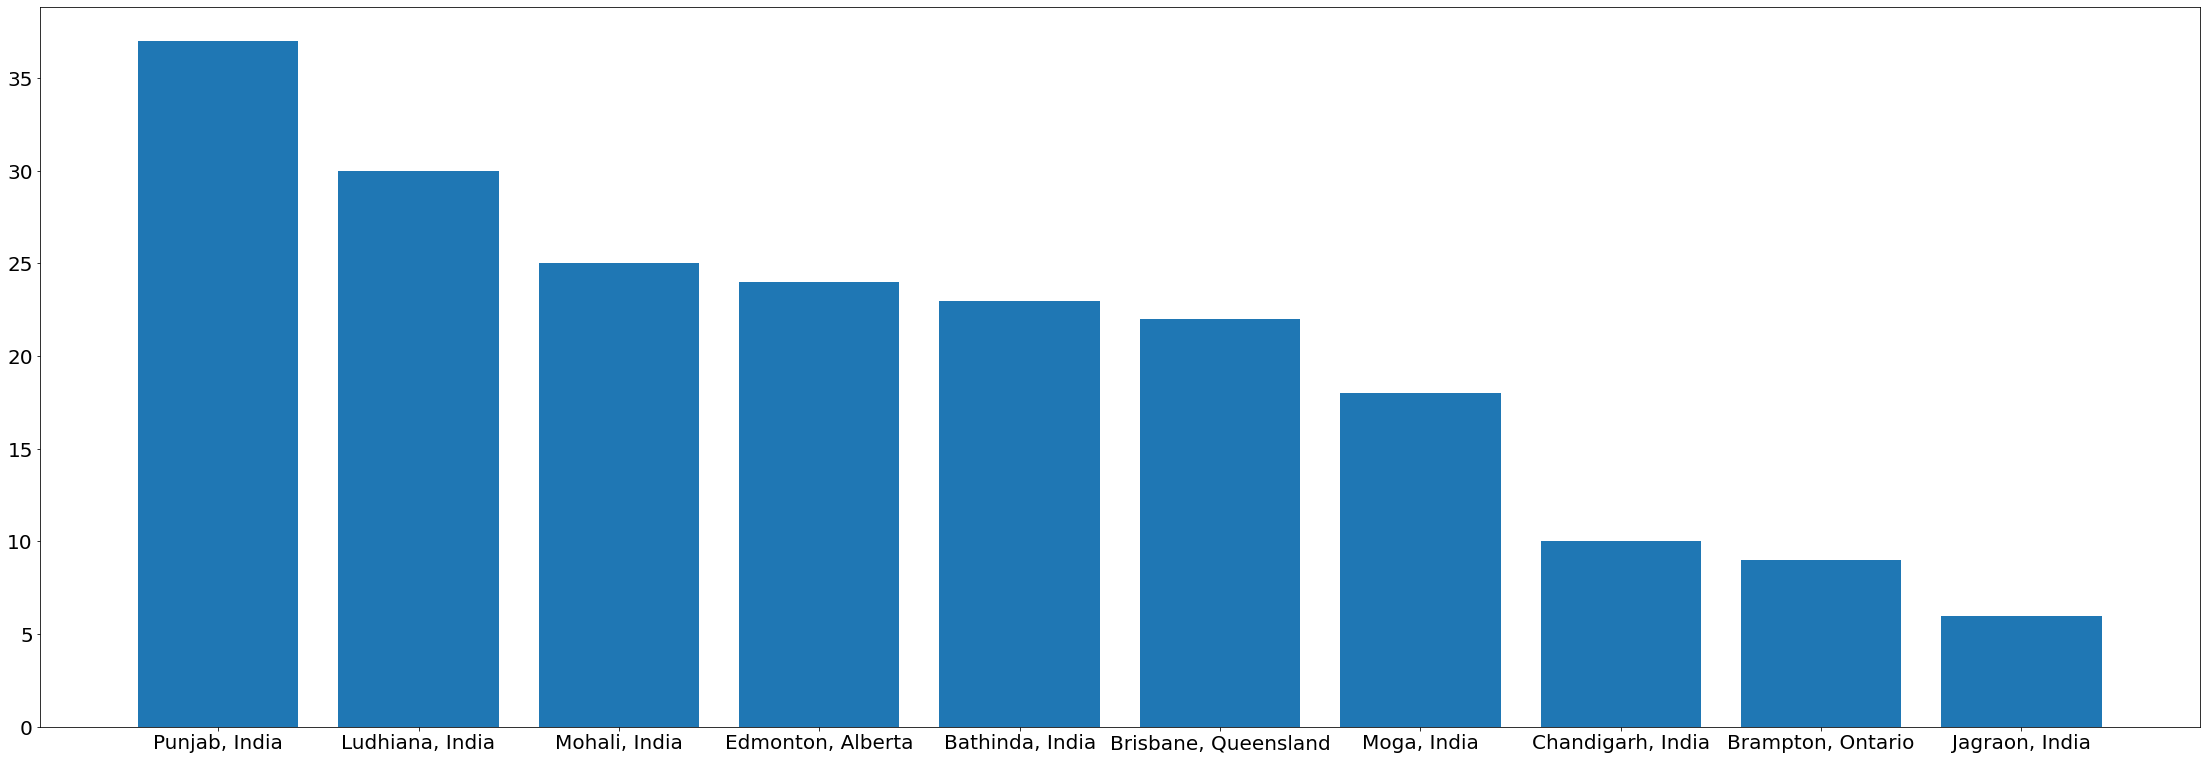

In [14]:
x_axis=list(dict_place.keys())[:10]
y_axis=list(dict_place.values())[:10]
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=30,10
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x_axis, y_axis)
plt.show()


As talked above, the Farmer Bill heavily affects the farmers of Punjab, and this can be seen in the representation that among thee people who mentioned their location in the tweet, highest(37) mentions Punjab, followed by Punjabi cities(Ludhiana and Mohali). Since lot of Punjabis are tweeting about this, we can see th next highest locations in Alberta, Canada, which is a place where a lot of Punjabis had immigrated in the past. This is again, followed by various Punjabi cities like Bathinda, Moga, Chandigarh, Jagraon, all of which are present in Punjab. 

In [15]:
loc_dic={}
for val in data:
    if not isinstance(val['user'],dict):
        continue
    if  'location' in val['user']:
        if val['user']['location']=='':
            continue
        if val['user']['location'] in loc_dic:
            loc_dic[val['user']['location']]+=1
        else:
            loc_dic[val['user']['location']]=1
loc_dic={k: v for k, v in sorted(loc_dic.items(), key=lambda item: item[1], reverse=True)}
len(loc_dic)

758

In [41]:
loc_dic

{'Punjab, India': 570,
 'India': 329,
 'Canada': 192,
 'United States': 175,
 'Punjab': 150,
 'Chandigarh, India': 149,
 'Moga, India': 120,
 'Brampton, Ontario': 114,
 '‡§™‡§Ç‡§ú‡§æ‡§¨, ‡§≠‡§æ‡§∞‡§§': 101,
 'Ludhiana, India': 94,
 'New Delhi, India': 85,
 'Edmonton, Alberta': 82,
 'Chicago, IL': 67,
 'Washington, USA': 65,
 'Bathinda, India': 65,
 'Vancouver, British Columbia': 64,
 'Surrey, British Columbia': 57,
 '‡®™‡®ø‡©∞‡®° ‡®ï‡©ã‡®∞‡®®‡®µ‡®æ‡®≤ ‡®ì‡®®‡®ü‡®æ‡®∞‡©Ä‡®ì': 56,
 '‡®™‡©∞‡®ú‡®æ‡®¨': 54,
 '‡®Æ‡®æ‡®≤‡®µ‡®æ ‡®™‡©∞‡®ú‡®æ‡®¨ ': 51,
 'Patiala, India': 49,
 '‡®ï‡©Ç‡©ú‡©Ä‡®Ü‡®Ç ‡®¶‡©á üíù ‡®¶‡®ø‡®≤‡®æ‡®Ç üíö ‡®µ‡®ø‡®ö  ': 45,
 'Winnipeg, Manitoba': 41,
 'Sangrur, India': 41,
 '‡®ñ‡©Ç‡®π ‡®µ‡®æ‡®≤‡©Ä ‡®Æ‡©ã‡®ü‡®∞ ': 41,
 'California, USA': 40,
 'New Zealand': 38,
 'Faridkot, India': 38,
 'Calgary, Alberta': 37,
 '‡®™‡©∞‡®ú‡®æ‡®¨ ': 37,
 'punjab': 37,
 'Surrey BC Canada': 33,
 'Toronto, Canada': 33,
 'Amritsar': 29,
 'Amritsar, Punjab': 28,
 'Amritsar, India': 27,
 'Mohali, Ind

/home/suyash/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2346 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/suyash/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/suyash/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/suyash/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/suyash/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/suyash/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2349 missing from current font.
  fon

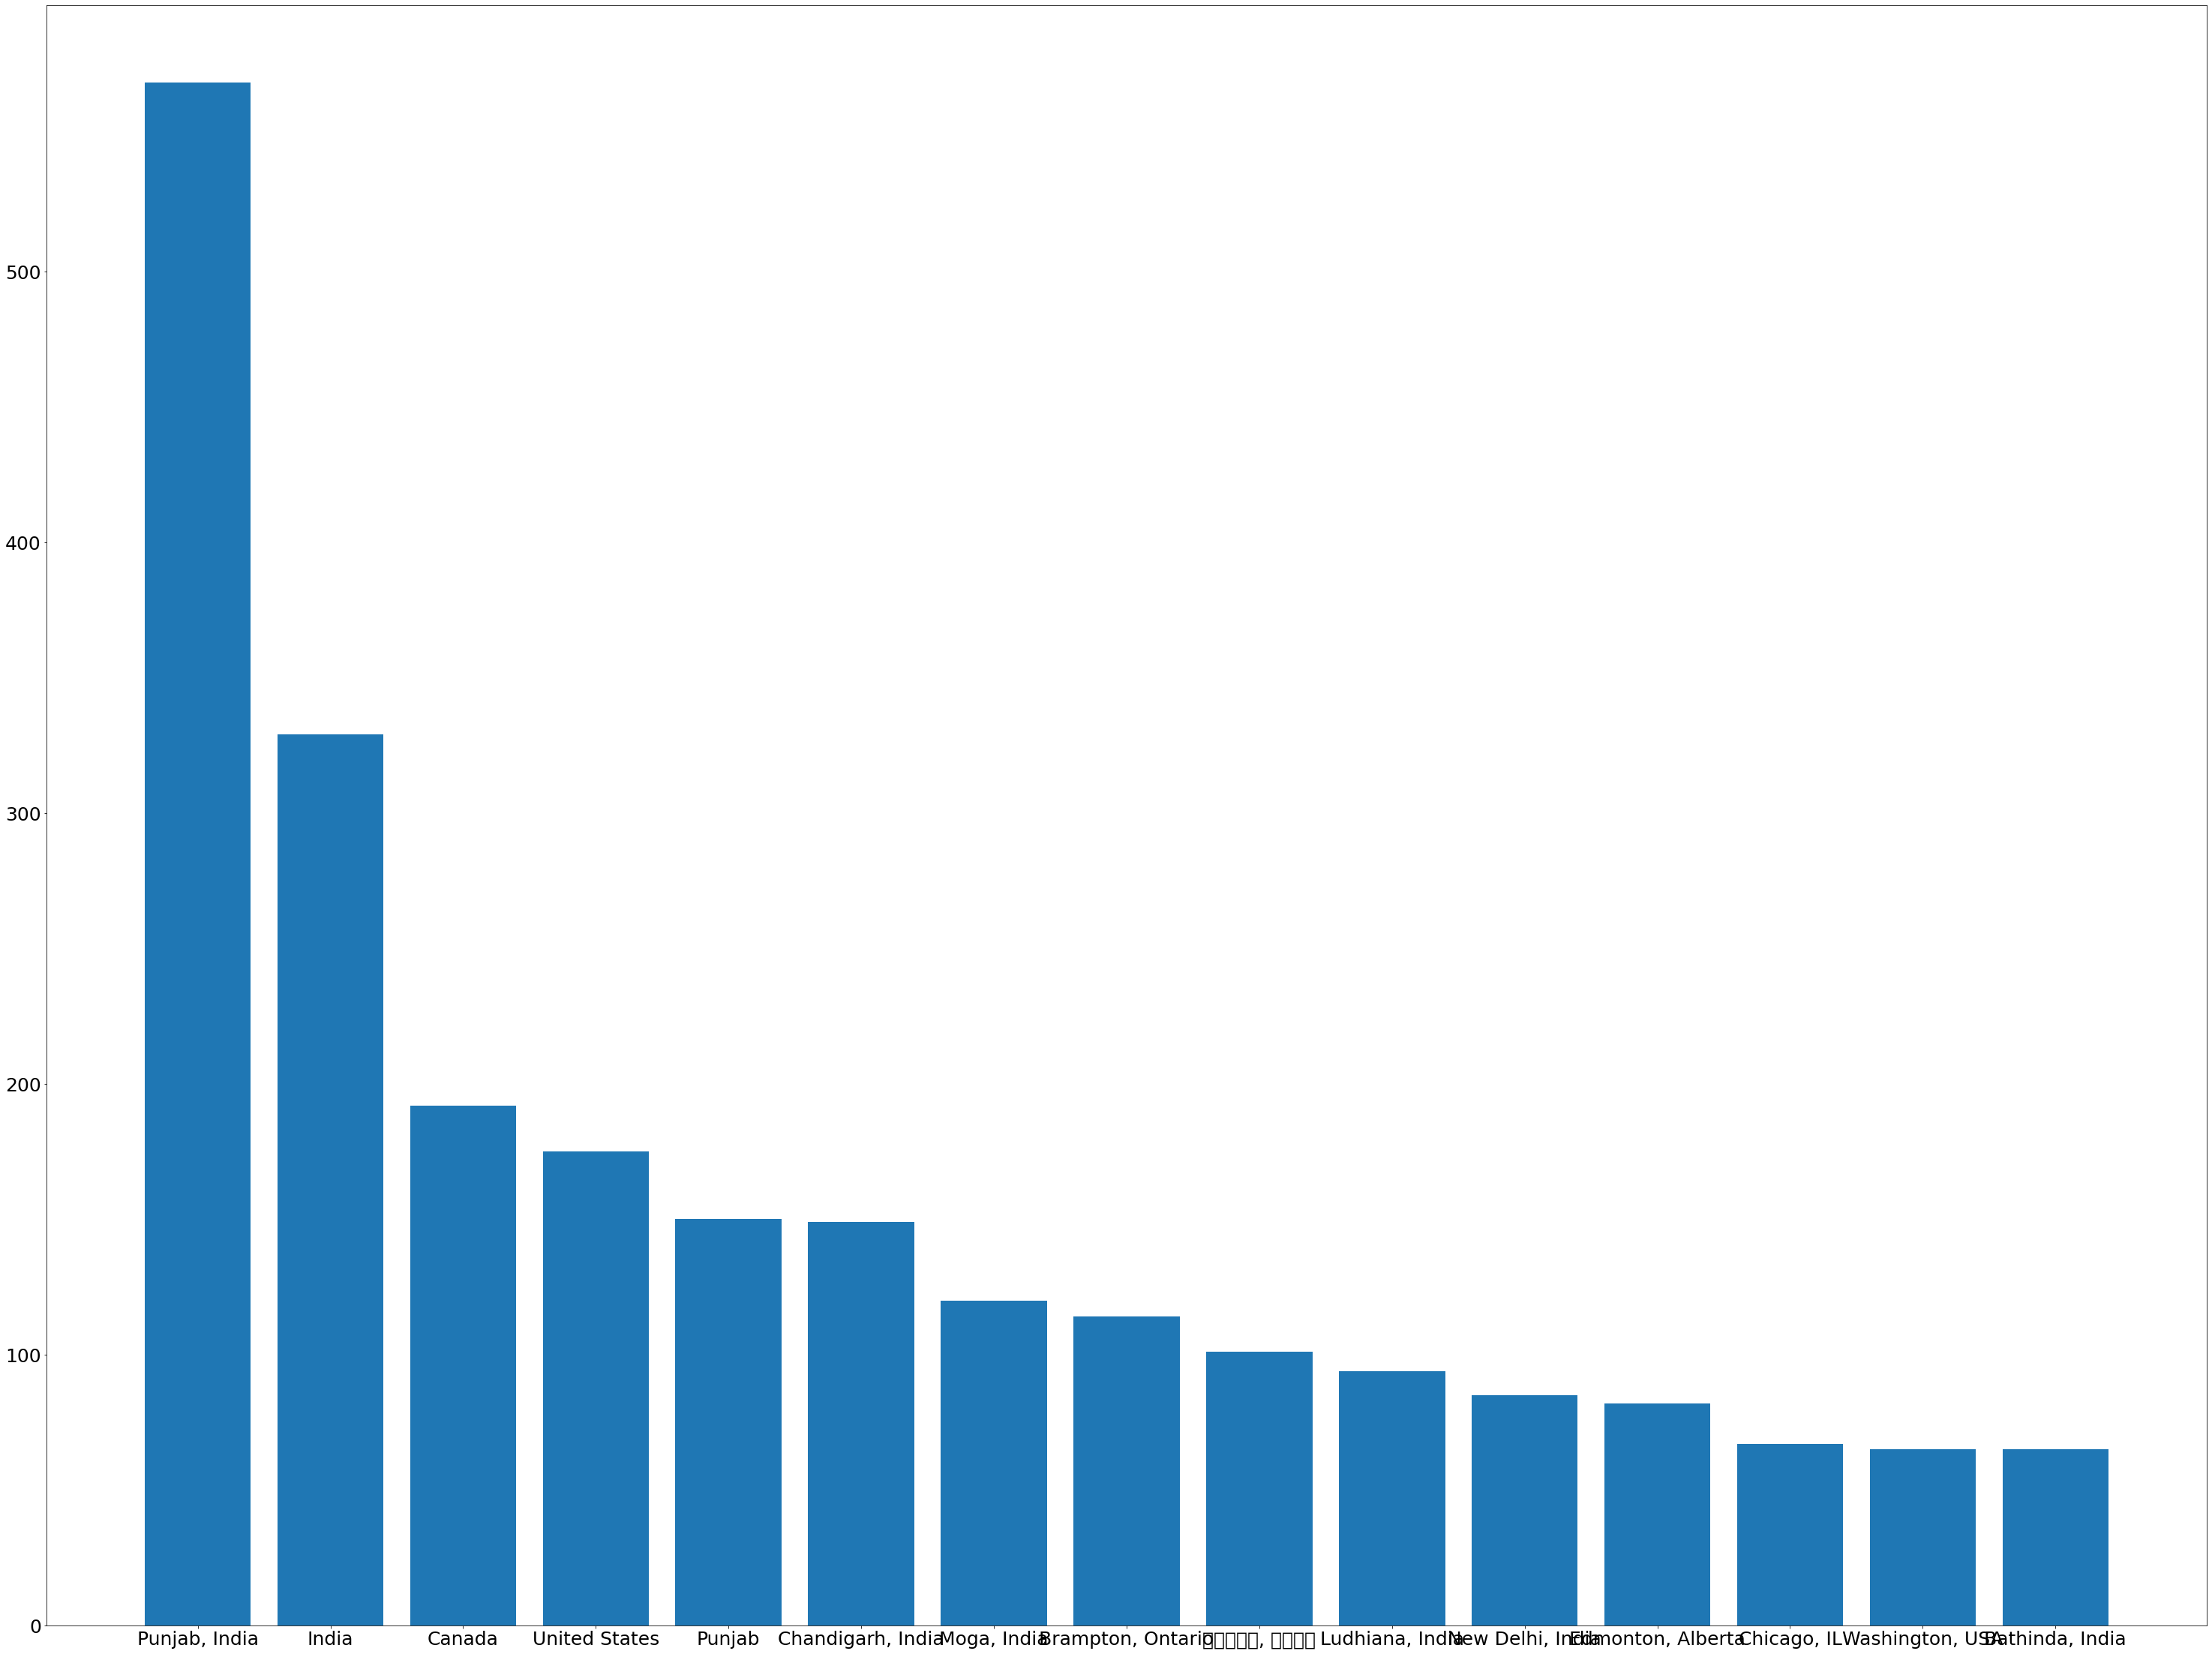

In [16]:
plt.rcParams["figure.figsize"]=40,30
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)
array1=list(loc_dic.keys())[:15]
array2=list(loc_dic.values())[:15]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(array1, array2)
plt.show()

The above graph, which shows the location of the accounts of the users, we again see the similar pattern as before, with major number of tweets coming from users residing in Punjab and Canada - Punjab, India having 570 users, and Canada, Punjab, Chandigarh, Moga and other Punjabi cities follow in the list.

In [3]:
import re
from collections import Counter
wordsarr=[]
for val in data:
    wordsarr+=re.split(', |_|-|!|\+| |\n', val['text'])
len(wordsarr)
print(wordsarr[:20])
seta=set(wordsarr)
fin_dict={}
for w in wordsarr:
    if w in fin_dict:
        fin_dict[w]+=1
    else:
        fin_dict[w]=1
fin_dict={k: v for k, v in sorted(fin_dict.items(), key=lambda item: item[1], reverse=True)}
fin_dict

['@jatt', 'junction', '@punjabisath1', '‡®¶‡©á‡®∏‡®º', '‡®µ‡®ø‡®∞‡©ã‡®ß‡©Ä', '‡®≠‡®æ‡®ú‡®™‡®æ', '‡®∏‡®∞‡®ï‡®æ‡®∞', '#GodiMediaAgainstFarmers', 'üëåüëåHahaha.', 'Giving', 'back', 'to', 'Modi', 'in', 'his', 'own', 'style.', 'üî•üî•üî•', '#GodiMediaAgainstFarmers', 'https://t.co/MUrPiAuzI6']


{'': 11529,
 '#GodiMediaAgainstFarmers': 9145,
 'media': 905,
 '@republic': 887,
 '@aajtak': 812,
 'the': 691,
 '@indiatvnews': 660,
 'Godi': 636,
 'farmers': 599,
 'to': 550,
 'is': 531,
 'of': 511,
 '@ZeeNews': 484,
 '‡®¶‡©á': 475,
 '‡®¶‡®æ': 459,
 'are': 428,
 'on': 428,
 '@abpnewshindi': 397,
 '‡®®‡©Ç‡©∞': 392,
 'and': 389,
 'Media': 382,
 '‡®§‡©á': 370,
 'a': 349,
 '‡®ï‡®∞‡©ã': 338,
 '‡®®‡®æ': 334,
 '‡§ï‡•á': 331,
 '‡®§‡©ã‡®Ç': 319,
 '#ShameOnFacebook': 300,
 'in': 292,
 '‡®¶‡©Ä': 290,
 '‡§π‡•à': 281,
 'for': 280,
 'godi': 276,
 '‡®Ö‡©±‡®ú': 268,
 'you': 263,
 '‡®ú‡©Ä': 254,
 'Shame': 253,
 '‡®Ü‡®™‡®£‡©Ä': 253,
 '‡®ï‡©á': 249,
 '#FarmersProtest': 245,
 '‡®µ‡®æ‡®π‡®ø‡®ó‡©Å‡®∞‡©Ç': 245,
 '‡®Æ‡©Ä‡®°‡©Ä‡®Ü': 243,
 '‡®®‡©á': 241,
 'Modi': 236,
 '‡®ï‡®∞‡©ã‡•§': 224,
 '@abpnewshindi‚Ä¶': 224,
 '@News18India': 222,
 '‡®Ü‡®™': 220,
 'Farmers': 216,
 '‡®µ‡©Ä': 215,
 '‡®∞‡®æ‡®ñ‡©Ä': 209,
 '‡®∏‡®∞‡®ï‡®æ‡®∞‡®æ': 208,
 '‡®ù‡®æ‡®ï': 208,
 '‡®®‡®æ‡®≤': 205,
 '‡®ó‡©ã‡®¶‡©Ä': 205,
 '‡§ï‡•Ä': 201,
 

We can see that words like 'media', as well as names of media/news outlets like '@republic', '@aajtak', '@indiatvnews', '@ZeeNews' have high number of occurences in the tweets. This is because the tweets are about News outlets reporting the Farmers issue, and this is why these can be seen in high numbers. We can also see high frequency of 'farmers',   which again points towards the issue being related to farmers.

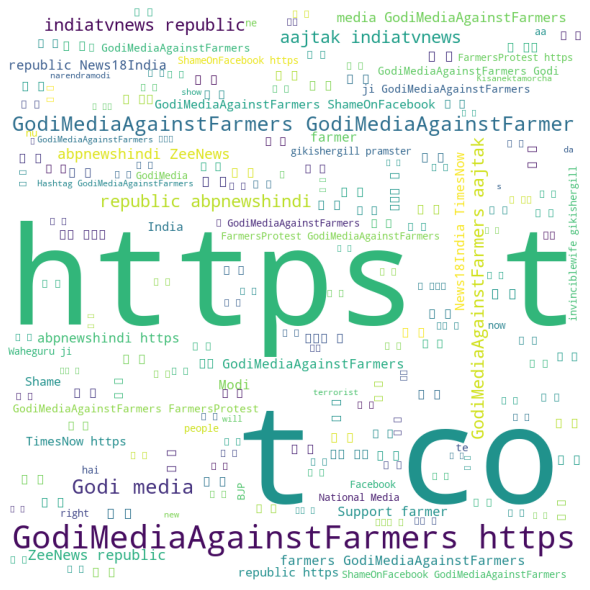

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
for x in range(len(wordsarr)):
    wordsarr[x]=wordsarr[x].strip()
    if len(wordsarr[x])==1:
        wordsarr[x]=""
comment_words=" ".join(wordsarr)
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,
                ).generate(comment_words)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Because of a large number of Punjabi words, meaningful word cloud and graphs couldn't be produced for lack of suitable font to handle Punjabi, Hindi and English simultaneously.